# Minimal Left Right Symmetric models with Higgs doublets

In this notebook we work the potential of MLRSM with Higgs doublets 

In [1]:
from sympy import symbols, init_printing, Matrix, I, sqrt, conjugate, trace, factor, simplify
from sympy.physics import msigma 
init_printing()

## Scalars

### Bidoublet

In [2]:
phi1p = symbols(r'{{\phi_1^+}}')
phi2p = symbols(r'{{\phi_2^+}}')

phi10, phi20 = symbols(r'\phi_1^0, \phi_2^0')

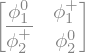

In [3]:
Phi = Matrix(
    [
        [phi10, phi1p],
        [conjugate(phi2p), phi20]
    ]
)
Phi

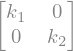

In [4]:
k1, k2 = symbols(r"k_1, k_2", positive=True)
sqrt2 = sqrt(2)
vevPhi = {phi10:k1, phi20:k2, phi1p:0, phi2p:0}
Phi.subs(vevPhi)

### Doublets

In [5]:
chiL0 = symbols(r'\chi_L^0')
chiR0 = symbols(r'\chi_R^0')

chiLp = symbols(r'{{\chi_L^+}}')
chiRp = symbols(r'{{\chi_R^+}}')

In [6]:
ChiL = Matrix(
    [
        [chiLp],
        [chiL0]
    ]
)

ChiR = Matrix(
    [
        [chiRp],
        [chiR0]
    ]
)

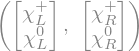

In [7]:
ChiL, ChiR

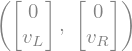

In [8]:
vL, vR = symbols(r'v_L, v_R', positive=True)
vevL = {chiL0:vL, chiLp:0}
vevR = {chiR0:vR, chiRp:0}
ChiL.subs(vevL), ChiR.subs(vevR)

## Scalar potential

In [9]:
from sympy.physics.quantum import Dagger
from sympy import solve

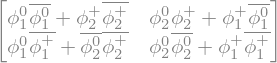

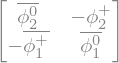

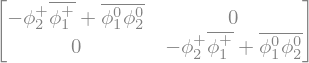

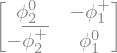

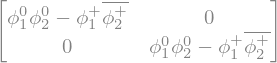

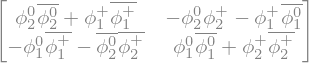

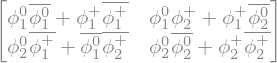

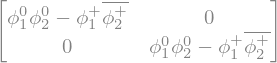

In [10]:
PhiDagger = Dagger(Phi)
#PhiDagger
PhiDaggerPhi = PhiDagger*Phi
display(PhiDaggerPhi)
Phitilde = (msigma(2)*conjugate(Phi)*msigma(2))
#Phitilde
display(Phitilde)
PhitildeDagger = Dagger(Phitilde)
PhiDaggerPhitilde = PhiDagger*Phitilde
display(PhiDaggerPhitilde)
#PhitildeDagger
display(PhitildeDagger)
PhitildeDaggerPhi = PhitildeDagger*Phi
display(PhitildeDaggerPhi)
PhitildeDaggerPhitilde = PhitildeDagger*Phitilde
display(PhitildeDaggerPhitilde)
PhiPhiDagger = Phi*PhiDagger
display(PhiPhiDagger)
PhiPhitildeDagger = Phi*PhitildeDagger
display(PhiPhitildeDagger)

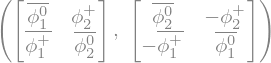

In [11]:
PhiDagger, Phitilde

In [12]:
ChiLDagger = Dagger(ChiL)
ChiRDagger = Dagger(ChiR)

ChiLDaggerChiL = (ChiLDagger*ChiL)[0]
display(ChiLDaggerChiL)
ChiRDaggerChiR = (ChiRDagger*ChiR)[0]
display(ChiRDaggerChiR)

In [13]:
mu12, mu22 = symbols(r'\mu_1^2, \mu_2^2', real=True)
lamb1, lamb2, lamb3, lamb4, lamb5, lamb6 = symbols(r'\lambda_1, \lambda_2, \lambda_3, \lambda_4, \lambda_5, \lambda_6', real=True)
alpha1, alpha2, alpha3 = symbols(r'\alpha_1, \alpha_2, \alpha_3', real=True)
rho1, rho2,= symbols(r'\rho_1, \rho_2', real=True)


In [14]:
#conjugate(trace(PhiDaggerPhitilde*PhiDaggerPhitilde))

In [15]:
#trace(PhitildeDaggerPhi*PhitildeDaggerPhi)

In [16]:
V = (
    - mu12*trace(PhiDaggerPhi)
    + lamb1*trace(PhiDaggerPhi)**2
    + lamb2*trace(PhiDaggerPhi*PhiDaggerPhi)
    + lamb3/2*(trace(PhiDaggerPhitilde) + trace(PhitildeDaggerPhi))**2
    + lamb4/2*(trace(PhiDaggerPhitilde) - trace(PhitildeDaggerPhi))**2
    + lamb5*trace(PhiDaggerPhi*PhitildeDaggerPhitilde)
    + lamb6/2*(trace(PhiDaggerPhitilde*PhiDaggerPhitilde) + conjugate(trace(PhiDaggerPhitilde*PhiDaggerPhitilde)))
    - mu22*(ChiLDaggerChiL + ChiRDaggerChiR)
    + rho1*(ChiLDaggerChiL**2 + ChiRDaggerChiR**2)
    + rho2*(ChiLDaggerChiL*ChiRDaggerChiR)
    + alpha1*trace(PhiDaggerPhi)*(ChiLDaggerChiL + ChiRDaggerChiR)
    + alpha2*(
        ChiLDagger*Phi*PhiDagger*ChiL
        + ChiRDagger*PhiDagger*Phi*ChiR
    )[0]
    + alpha3*(
        ChiLDagger*Phitilde*PhitildeDagger*ChiL
        + ChiRDagger*PhitildeDagger*Phitilde*ChiR
    )[0]
)

In [17]:
vevR

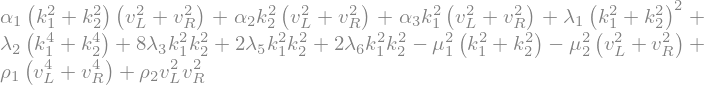

In [18]:
VLRPhi_vev = V.subs(vevL).subs(vevR).subs(vevPhi).simplify()#.collect([mu12, mu22, mu32, lamb2, rho1, beta2], factor)#.subs(k1ri)
VLRPhi_vev

### Tadpole conditions

In [19]:
scalar_vevs = [k1, k2, vL, vR]
tadpoles_relations = {}
for vev in scalar_vevs:
    tadpoles_relations[vev] = VLRPhi_vev.diff(vev).factor()

In [20]:
for muij, tadpole in tadpoles_relations.items():
    display(muij)
    tadpole_simplified = tadpole.collect([k1, k2, vL, vR], factor)
    display(tadpole_simplified)

In [21]:
tadpoles_relations[k1].subs(k2,0).subs(vL, 0).factor()

In [22]:
tadpoles_relations[vR].subs(k2,0).subs(vL, 0)

In [23]:
tadpole12_sol = solve([tadpoles_relations[k1], tadpoles_relations[vR]], [mu12, mu22], dict=True)[0]
tadpole12_sol

In [24]:
tadpoles_relations_simplified = {}
for muij, tadpole in tadpole12_sol.items():
    display(muij)
    tadpole_simplified = tadpole.collect([k1, k2, vL, vR], factor).subs(k2,0).subs(vL, 0) # remove vL and vR
    display(tadpole_simplified)
    tadpoles_relations_simplified[muij] = tadpole_simplified

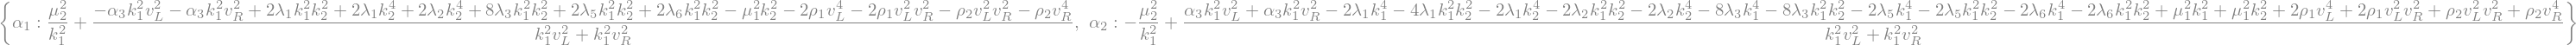

In [25]:
tadpole12_sol_2L = solve([tadpoles_relations[k2], tadpoles_relations[vL]], [alpha1, alpha2, mu22], dict=True)[0]
tadpole12_sol_2L

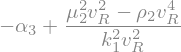

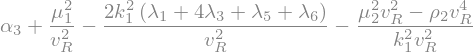

In [26]:
tadpoles_relations_simplified_2L = {}
for muij, tadpole in tadpole12_sol_2L.items():
    display(muij)
    tadpole_simplified = tadpole.expand().collect([k1, k2, vL, vR], factor).subs(k2,0).subs(vL, 0)
    display(tadpole_simplified)
    tadpoles_relations_simplified_2L[muij] = tadpole_simplified

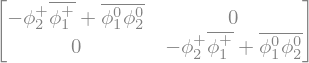

In [27]:
PhiDagger * Phitilde

In [31]:
# ...existing code...
# filepath: c:\Users\moise\OneDrive\Escritorio\LRSM-with-Spheno\sympy_calculations\DLRSM\potential_senjanovic_HiggsDoublets_SARAH_comparisons.ipynb

from sympy import Eq, simplify, expand, Matrix, symbols, conjugate, trace, I, KroneckerDelta, LeviCivita
from sympy.physics.quantum import Dagger

# --- Define all symbols and matrices as in your notebook ---
# (Assume: Phi, ChiL, ChiR, etc. are already defined)

# --- SARAH-style contractions as Python functions ---
def sarah_trace_PhiDaggerPhi(Phi):
    # trace(Dagger(Phi) * Phi)
    res = 0
    for rig1 in range(2):
        for rig2 in range(2):
            for lef1 in range(2):
                for lef2 in range(2):
                    res += KroneckerDelta(lef1, lef2) * KroneckerDelta(rig1, rig2) * conjugate(Phi[lef1, rig1]) * Phi[lef2, rig2]
    return res

def sarah_trace_PhiDaggerPhi_squared(Phi):
    # trace(Dagger(Phi) * Phi) ** 2
    res = 0
    for rig1 in range(2):
        for rig2 in range(2):
            for lef1 in range(2):
                for lef2 in range(2):
                    for rig3 in range(2):
                        for rig4 in range(2):
                            for lef3 in range(2):
                                for lef4 in range(2):
                                    res += (KroneckerDelta(lef1, lef2) * KroneckerDelta(rig1, rig2) *
                                            conjugate(Phi[lef1, rig1]) * Phi[lef2, rig2] *
                                            KroneckerDelta(lef3, lef4) * KroneckerDelta(rig3, rig4) *
                                            conjugate(Phi[lef3, rig3]) * Phi[lef4, rig4])
    return res

def sarah_trace_PhiDaggerPhi_PhiDaggerPhi(Phi):
    # \delta_{l_{1}l_{2}}\delta_{r_{2}r_{3}}\delta_{l_{3}l_{4}}\delta_{r_{1}r_{4}}
    # \Phi_{l_{1}r_{1}}^{*}\Phi_{l_{2}r_{2}}\Phi_{l_{3}r_{3}}^{*}\Phi_{l_{4}r_{4}}
    res = 0
    for rig1 in range(2):
        for rig2 in range(2):
            for lef1 in range(2):
                for lef2 in range(2):
                    for rig3 in range(2):
                        for rig4 in range(2):
                            for lef3 in range(2):
                                for lef4 in range(2):
                                    res += (KroneckerDelta(lef1, lef2) * KroneckerDelta(rig2, rig3) *
                                            KroneckerDelta(lef3, lef4) * KroneckerDelta(rig1, rig4) *
                                            conjugate(Phi[lef1, rig1]) * Phi[lef2, rig2] *
                                            conjugate(Phi[lef3, rig3]) * Phi[lef4, rig4])
    return res

def sarah_trace_PhiDaggerPhitilde(Phi):
    # \epsilon_{l_{1}l_{2}}\epsilon_{r_{1}r_{2}}\Phi_{l_{1}r_{1}}^{*}\Phi_{l_{2}r_{2}}^{*}
    res = 0
    for rig1 in range(2):
        for rig2 in range(2):
            for lef1 in range(2):
                for lef2 in range(2):
                    res += (LeviCivita(lef1, lef2) * LeviCivita(rig1, rig2) *
                            conjugate(Phi[lef1, rig1]) * conjugate(Phi[lef2, rig2]))
    return res
        
def sarah_trace_PhitildeDaggerPhi(Phi):
    # \epsilon_{r_{1}r_{2}}\epsilon_{l_{1}l_{2}}\Phi_{l_{1}r_{1}}\Phi_{l_{2}r_{2}}
    res = 0
    for rig1 in range(2):
        for rig2 in range(2):
            for lef1 in range(2):
                for lef2 in range(2):
                    res += (LeviCivita(rig1, rig2) * LeviCivita(lef1, lef2) *
                            Phi[lef1, rig1] * Phi[lef2, rig2])
    return res

def sarah_trace_PhiDaggerPhi_PhitildeDaggerPhitilde(Phi):
    # \epsilon_{r_{2}r_{3}}\epsilon_{r_{1}r_{4}}\delta_{l_{1}l_{2}}\delta_{l_{3}l_{4}}
    # \Phi_{l_{1}r_{1}}^{*}\Phi_{l_{2}r_{2}}\Phi_{l_{3}r_{3}}\Phi_{l_{4}r_{4}}^{*}
    res = 0
    for rig1 in range(2):
        for rig2 in range(2):
            for lef1 in range(2):
                for lef2 in range(2):
                    for rig3 in range(2):
                        for rig4 in range(2):
                            for lef3 in range(2):
                                for lef4 in range(2):
                                    res += (LeviCivita(rig2, rig3) * LeviCivita(rig1, rig4) *
                                            KroneckerDelta(lef1, lef2) * KroneckerDelta(lef3, lef4) *
                                            conjugate(Phi[lef1, rig1]) * Phi[lef2, rig2] *
                                            Phi[lef3, rig3] * conjugate(Phi[lef4, rig4]))
    return res

def sarah_trace_PhiDaggerPhitilde_PhiDaggerPhitilde(Phi):
    # \epsilon_{l_{1}l_{2}}\epsilon_{r_{2}r_{3}}\epsilon_{l_{3}l_{4}}\epsilon_{r_{4}r_{1}}
    # \Phi_{l_{1}r_{1}}^{*}\Phi_{l_{2}r_{2}}^{*}\Phi_{l_{3}r_{3}}^{*}\Phi_{l_{4}r_{4}}^{*}
    res = 0
    for rig1 in range(2):
        for rig2 in range(2):
            for lef1 in range(2):
                for lef2 in range(2):
                    for rig3 in range(2):
                        for rig4 in range(2):
                            for lef3 in range(2):
                                for lef4 in range(2):
                                    res += (LeviCivita(lef1, lef2) * LeviCivita(rig2, rig3) *
                                            LeviCivita(lef3, lef4) * LeviCivita(rig4, rig1) *
                                            conjugate(Phi[lef1, rig1]) * conjugate(Phi[lef2, rig2]) *
                                            conjugate(Phi[lef3, rig3]) * conjugate(Phi[lef4, rig4]))
    return res

def sarah_trace_PhitildeDaggerPhi_PhitildeDaggerPhi(Phi):
    # \epsilon_{r_{4}r_{1}}\epsilon_{l_{1}l_{2}}\epsilon_{r_{2}r_{3}}\epsilon_{l_{3}l_{4}}
    # \Phi_{l_{1}r_{1}}\Phi_{l_{2}r_{2}}\Phi_{l_{3}r_{3}}\Phi_{l_{4}r_{4}}
    res = 0
    for rig1 in range(2):
        for rig2 in range(2):
            for lef1 in range(2):
                for lef2 in range(2):
                    for rig3 in range(2):
                        for rig4 in range(2):
                            for lef3 in range(2):
                                for lef4 in range(2):
                                    res += (LeviCivita(rig4, rig1) * LeviCivita(lef1, lef2) *
                                            LeviCivita(rig2, rig3) * LeviCivita(lef3, lef4) *
                                            Phi[lef1, rig1] * Phi[lef2, rig2] *
                                            Phi[lef3, rig3] * Phi[lef4, rig4])
    return res

def sarah_ChiLDaggerChiL(ChiL):
    return (Dagger(ChiL) * ChiL)[0]

def sarah_ChiRDaggerChiR(ChiR):
    return (Dagger(ChiR) * ChiR)[0]

def sarah_chiLDaggerPhiPhiDaggerchiL(ChiL, Phi):
    # \delta_{l_{1}l_{2}}\delta_{r_{2}r_{3}}\delta_{l_{3}l_{4}}
    # \chi_{L,l_{1}}^{*}\Phi_{l_{2}r_{2}}\Phi_{l_{3}r_{3}}^{*}\chi_{L,l_{4}}
    res = 0
    for rig2 in range(2):
        for lef1 in range(2):
            for lef2 in range(2):
                for rig3 in range(2):
                    for lef3 in range(2):
                        for lef4 in range(2):    
                            res += (KroneckerDelta(lef1, lef2) * KroneckerDelta(rig2, rig3) *
                                    KroneckerDelta(lef3, lef4) *
                                    conjugate(ChiL[lef1]) * Phi[lef2, rig2] *
                                    conjugate(Phi[lef3, rig3]) * ChiL[lef4])
    return res

def sarah_chiRDaggerPhiDaggerPhichiR(ChiR, Phi):
    # \delta_{r_{1}r_{2}}\delta_{l_{2}l_{3}}\delta_{r_{3}r_{4}}
    # \chi_{R,r_{1}}^{*}\Phi_{l_{2}r_{2}}^{*}\Phi_{l_{3}r_{3}}\chi_{R,r_{4}}
    res = 0
    for rig1 in range(2):
        for lef2 in range(2):
            for lef3 in range(2):
                for rig2 in range(2):
                    for rig3 in range(2):
                        for rig4 in range(2):
                            res += (KroneckerDelta(rig1, rig2) * KroneckerDelta(lef2, lef3) *
                                    KroneckerDelta(rig3, rig4) *
                                    conjugate(ChiR[rig1]) * conjugate(Phi[lef2, rig2]) *
                                    Phi[lef3, rig3] * ChiR[rig4])
    return res

def sarah_chiLDaggerPhitildePhitildeDaggerchiL(ChiL, Phi):
    # \epsilon_{l_{2}l_{1}}\epsilon_{l_{3}l_{4}}\delta_{r_{2}r_{3}}
    # \chi_{L,l_{1}}^{*}\Phi_{l_{2}r_{2}}^{*}\Phi_{l_{3}r_{3}}\chi_{L,l_{4}}
    res = 0
    for rig2 in range(2):
        for lef1 in range(2):
            for lef2 in range(2):
                for rig3 in range(2):
                    for lef3 in range(2):
                        for lef4 in range(2):    
                            res += (LeviCivita(lef2, lef1) * LeviCivita(lef3, lef4) *
                                    KroneckerDelta(rig2, rig3) *
                                    conjugate(ChiL[lef1]) * conjugate(Phi[lef2, rig2]) *
                                    Phi[lef3, rig3] * ChiL[lef4])
    return res

def sarah_chiRDaggerPhitildeDaggerPhitildechiR(ChiR, Phi):
    # \epsilon_{r_{1}r_{2}}\epsilon_{r_{4}r_{3}}\delta_{l_{2}l_{3}}
    # \chi_{R,r_{1}}\Phi_{l_{2}r_{2}}\Phi_{l_{3}r_{3}}^{*}\chi_{R,r_{4}}
    res = 0
    for rig1 in range(2):
        for lef2 in range(2):
            for lef3 in range(2):
                for rig2 in range(2):
                    for rig3 in range(2):
                        for rig4 in range(2):
                            res += (LeviCivita(rig1, rig2) * LeviCivita(rig4, rig3) *
                                    KroneckerDelta(lef2, lef3) *
                                    conjugate(ChiR[rig1]) * Phi[lef2, rig2] *
                                    conjugate(Phi[lef3, rig3]) * ChiR[rig4])
    return res

# --- Build SARAH-style terms ---
PhiDaggerPhi = sarah_trace_PhiDaggerPhi(Phi)
PhiDaggerPhi_sq = sarah_trace_PhiDaggerPhi_squared(Phi)
PhiDaggerPhiPhiDaggerPhi = sarah_trace_PhiDaggerPhi_PhiDaggerPhi(Phi)
PhiDaggerPhitilde = sarah_trace_PhiDaggerPhitilde(Phi)
PhitildeDaggerPhi = sarah_trace_PhitildeDaggerPhi(Phi)
PhiDaggerPhiPhitildeDaggerPhitilde = sarah_trace_PhiDaggerPhi_PhitildeDaggerPhitilde(Phi)
PhiDaggerPhitildePhiDaggerPhitilde = sarah_trace_PhiDaggerPhitilde_PhiDaggerPhitilde(Phi)
PhitildeDaggerPhiPhitildeDaggerPhi = sarah_trace_PhitildeDaggerPhi_PhitildeDaggerPhi(Phi)
ChiLDaggerChiL = sarah_ChiLDaggerChiL(ChiL)
ChiRDaggerChiR = sarah_ChiRDaggerChiR(ChiR)
chiLDaggerPhiPhiDaggerchiL = sarah_chiLDaggerPhiPhiDaggerchiL(ChiL, Phi)
chiRDaggerPhiDaggerPhichiR = sarah_chiRDaggerPhiDaggerPhichiR(ChiR, Phi)
chiLDaggerPhitildePhitildeDaggerchiL = sarah_chiLDaggerPhitildePhitildeDaggerchiL(ChiL, Phi)
chiRDaggerPhitildeDaggerPhitildechiR = sarah_chiRDaggerPhitildeDaggerPhitildechiR(ChiR, Phi)

# --- Explicit terms from your notebook ---
# (Assume: you have already defined these as in your notebook)

# --- Comparison function ---
def compare_terms(term1, term2, name):
    eq = simplify(expand(term1 - term2))
    print(f"Comparison for {name}:")
    if eq == 0:
        print("  ✔️ Equivalent")
    else:
        print("  ❌ Not equivalent")
        print("  Difference:", eq)
    print()

# --- Compare each term ---
compare_terms(PhiDaggerPhi, trace(Dagger(Phi)*Phi), "Tr(Phi† Phi)")
compare_terms(PhiDaggerPhi_sq, trace(Dagger(Phi)*Phi)**2, "Tr(Phi† Phi)^2")
compare_terms(PhiDaggerPhiPhiDaggerPhi, trace(PhiDagger*Phi*PhiDagger*Phi), "Tr(Phi† Phi Phi† Phi)")
compare_terms(PhiDaggerPhitilde, trace(PhiDagger * Phitilde), "Tr(Phi† Phitilde)")
compare_terms(PhitildeDaggerPhi, trace(Dagger(Phitilde) * Phi), "Tr(Phitilde† Phi)")
compare_terms(PhiDaggerPhiPhitildeDaggerPhitilde, trace(PhiDagger*Phi * PhitildeDagger*Phitilde), "Tr(Phi† Phi Phitilde† Phitilde)")
compare_terms(PhiDaggerPhitildePhiDaggerPhitilde, trace(PhiDagger*Phitilde * PhiDagger*Phitilde), "Tr(Phi† Phitilde Phi† Phitilde)")
compare_terms(PhitildeDaggerPhiPhitildeDaggerPhi, trace(Dagger(Phitilde)*Phi * Dagger(Phitilde)*Phi), "Tr(Phitilde† Phi Phitilde† Phi)")
compare_terms(ChiLDaggerChiL, (Dagger(ChiL) * ChiL)[0], "ChiL† ChiL")
compare_terms(ChiRDaggerChiR, (Dagger(ChiR) * ChiR)[0], "ChiR† ChiR")
compare_terms(chiLDaggerPhiPhiDaggerchiL, (Dagger(ChiL) * Phi * Dagger(Phi) * ChiL)[0], "ChiL† Phi Phi† ChiL")
compare_terms(chiRDaggerPhiDaggerPhichiR, (Dagger(ChiR) * Dagger(Phi) * Phi * ChiR)[0], "ChiR† Phi† Phi ChiR")
compare_terms(chiLDaggerPhitildePhitildeDaggerchiL, (Dagger(ChiL) * Phitilde * Dagger(Phitilde) * ChiL)[0], "ChiL† Phitilde Phitilde† ChiL")
compare_terms(chiRDaggerPhitildeDaggerPhitildechiR, (Dagger(ChiR) * Dagger(Phitilde) * Phitilde * ChiR)[0], "ChiR† Phitilde† Phitilde ChiR")


# --- You can add more terms as needed following the above pattern ---

Comparison for Tr(Phi† Phi):
  ✔️ Equivalent

Comparison for Tr(Phi† Phi)^2:
  ✔️ Equivalent

Comparison for Tr(Phi† Phi Phi† Phi):
  ✔️ Equivalent

Comparison for Tr(Phi† Phitilde):
  ✔️ Equivalent

Comparison for Tr(Phitilde† Phi):
  ✔️ Equivalent

Comparison for Tr(Phi† Phi Phitilde† Phitilde):
  ✔️ Equivalent

Comparison for Tr(Phi† Phitilde Phi† Phitilde):
  ✔️ Equivalent

Comparison for Tr(Phitilde† Phi Phitilde† Phi):
  ✔️ Equivalent

Comparison for ChiL† ChiL:
  ✔️ Equivalent

Comparison for ChiR† ChiR:
  ✔️ Equivalent

Comparison for ChiL† Phi Phi† ChiL:
  ✔️ Equivalent

Comparison for ChiR† Phi† Phi ChiR:
  ✔️ Equivalent

Comparison for ChiL† Phitilde Phitilde† ChiL:
  ✔️ Equivalent

Comparison for ChiR† Phitilde† Phitilde ChiR:
  ✔️ Equivalent



In [54]:
((Dagger(ChiR) * Dagger(Phitilde) * Phitilde * ChiR)[0]- sarah_chiRDaggerPhitildeDaggerPhitildechiR(ChiR, Phi)).expand()

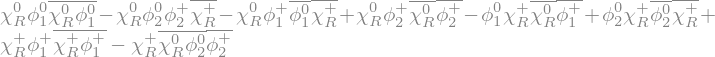

In [55]:
sarah_chiRDaggerPhitildeDaggerPhitildechiR(ChiR, Phi)

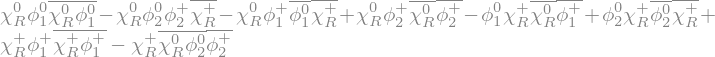

In [56]:
(Dagger(ChiR) * Dagger(Phitilde) * Phitilde * ChiR)[0].expand()